In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###1.Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции

####U-образные

Точность K-NN (классификация, k=5): 1.00
Точность радиусного классификатора: 0.48
Точность взвешенного K-NN (k=5): 1.00
Точность взвешенного K-NN (k=20): 1.00


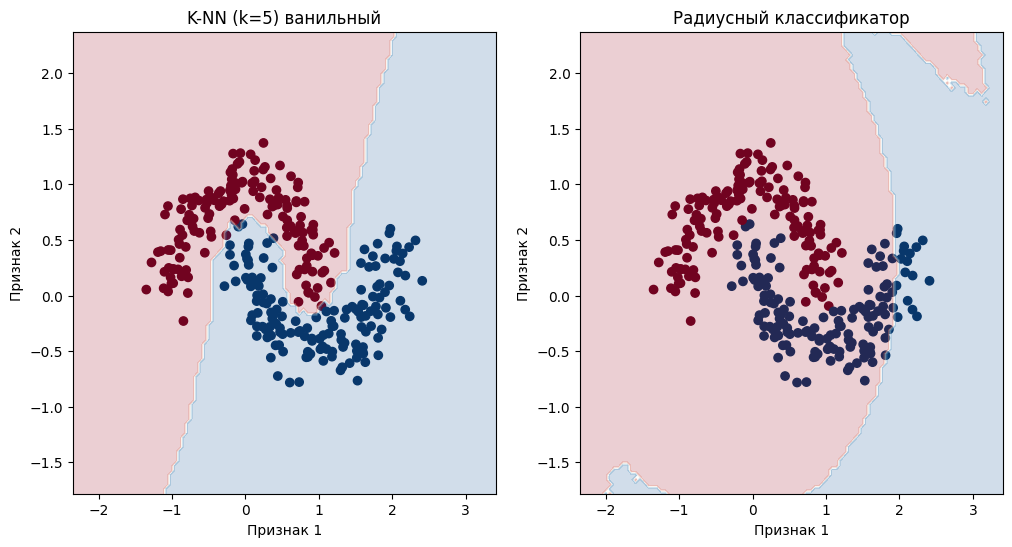

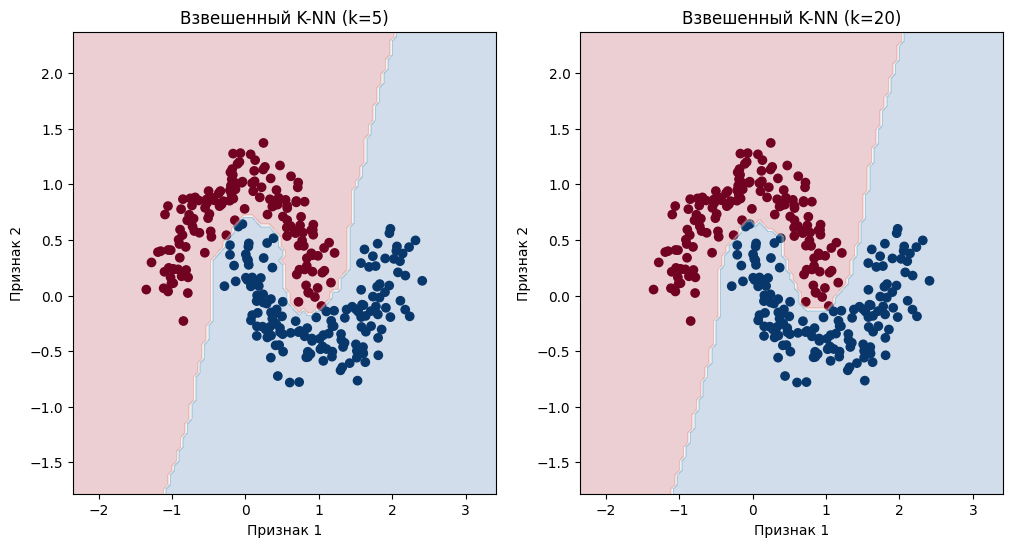

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Создание U-образных данных
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# К-NN ванильный(k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print(f'Точность K-NN (классификация, k=5): {accuracy:.2f}')

# Радиусный классификатор (радиус=3)
radius_classifier = RadiusNeighborsClassifier(radius=3)   #РАДИУС
radius_classifier.fit(X_train, y_train)
accuracy = radius_classifier.score(X_test, y_test)
print(f'Точность радиусного классификатора: {accuracy:.2f}')

# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)
accuracy = weighted_knn_5.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=5): {accuracy:.2f}')

# Взвешенный K-NN с k=20
weighted_knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
weighted_knn_20.fit(X_train, y_train)
accuracy = weighted_knn_20.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=20): {accuracy:.2f}')

# Визуализация данных и границы принятия решений (k-NN ванильный)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("K-NN (k=5) ванильный")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=20)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=20)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()


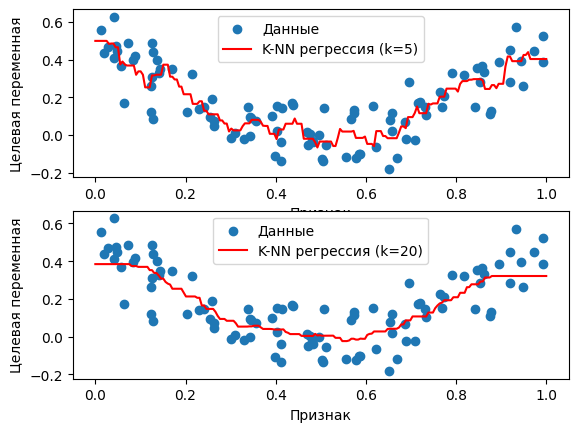

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Генерация данных U-образных данных
X = np.random.rand(100, 1)
y = 2 * (X - 0.5) ** 2 + 0.1 * np.random.randn(100, 1)

# Создание модели K-NN регрессии (k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.linspace(0, 1, 200).reshape(-1, 1)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.subplot(211)

plt.scatter(X, y, label='Данные')
plt.plot(X_new, y_pred, color='red', label='K-NN регрессия (k=5)')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.legend()

# Создание модели K-NN регрессии (k=20)
knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.linspace(0, 1, 200).reshape(-1, 1)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.subplot(212)

plt.scatter(X, y, label='Данные')
plt.plot(X_new, y_pred, color='red', label='K-NN регрессия (k=20)')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.legend()
plt.show()


####Концентрические окружности

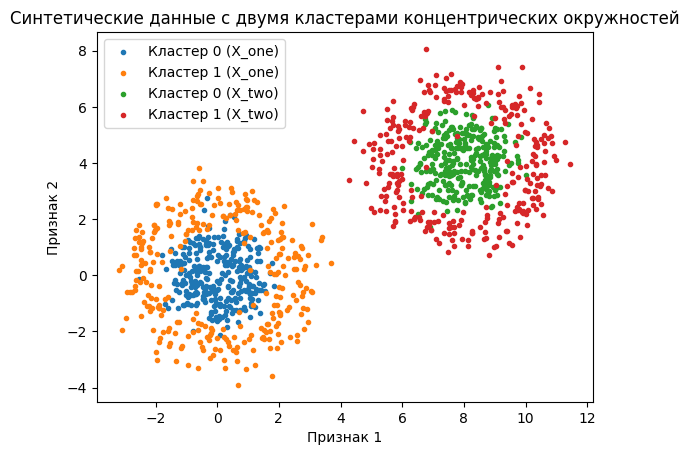

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетических данных с тремя кластерами концентрических окружностей
def generate_concentric_circles(n_samples, radii, noise):
    np.random.seed(42)
    theta = np.linspace(0, 2 * np.pi, n_samples)
    circles_one, circles_two = [], []

    for radius in radii:
        circle_one = np.column_stack((radius * np.cos(theta), radius * np.sin(theta)))
        circle_two = np.column_stack((radius * np.cos(theta) + 8, radius * np.sin(theta) + 4))
        circles_one.append(circle_one)
        circles_two.append(circle_two)

    X_one = np.concatenate(circles_one)
    X_two = np.concatenate(circles_two)
    y_one = np.concatenate([i * np.ones(n_samples) for i in range(len(radii))])
    y_two = np.concatenate([i * np.ones(n_samples) for i in range(len(radii))])

    # Добавим небольшой шум
    X_one += np.random.normal(scale=noise, size=X_one.shape)
    X_two += np.random.normal(scale=noise, size=X_two.shape)

    return X_one, y_one, X_two, y_two

# Параметры для генерации данных
n_samples = 300
radii = [1.0, 2.5]
noise = 0.5

# Генерация данных
X_one, y_one, X_two, y_two = generate_concentric_circles(n_samples, radii, noise)

# Визуализация данных
plt.scatter(X_one[y_one == 0, 0], X_one[y_one == 0, 1], label='Кластер 0 (X_one)', marker='.')
plt.scatter(X_one[y_one == 1, 0], X_one[y_one == 1, 1], label='Кластер 1 (X_one)', marker='.')

plt.scatter(X_two[y_two == 0, 0], X_two[y_two == 0, 1], label='Кластер 0 (X_two)', marker='.')
plt.scatter(X_two[y_two == 1, 0], X_two[y_two == 1, 1], label='Кластер 1 (X_two)', marker='.')

plt.title('Синтетические данные с двумя кластерами концентрических окружностей')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

X_combined = np.concatenate([X_one, X_two])
y_combined = np.concatenate([y_one, y_two])

Точность K-NN (классификация, k=5): 0.95
Точность радиусного классификатора: 0.35
Точность взвешенного K-NN (k=5): 0.94
Точность взвешенного K-NN (k=20): 0.94


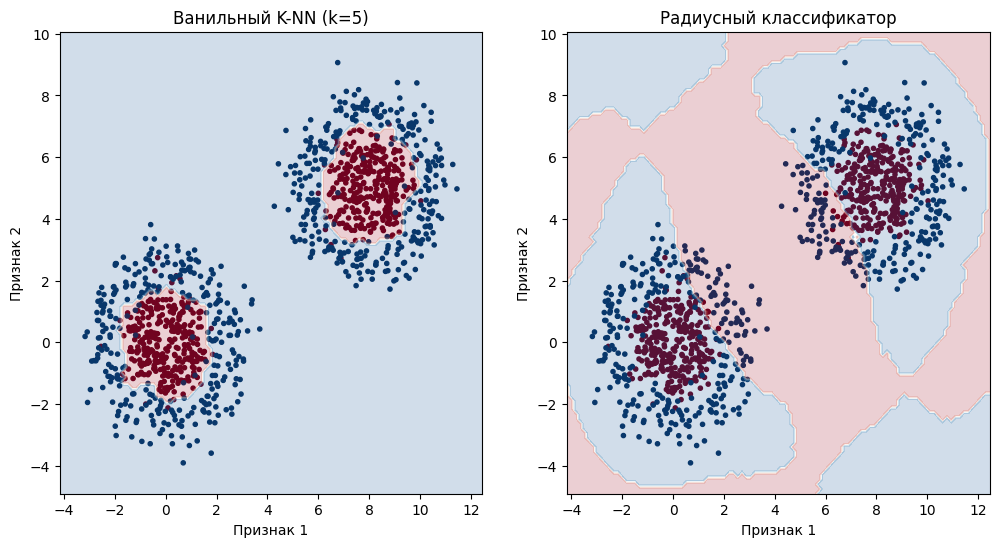

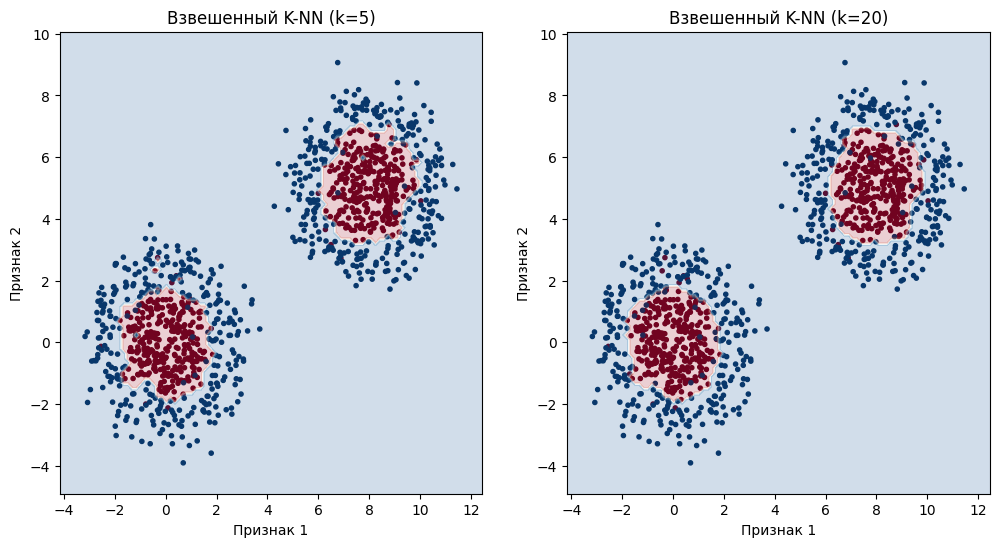

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor
import matplotlib.pyplot as plt

# Генерация данных в виде концентрических окружностей
#np.random.seed(7)
#n_samples = 400
#X = np.random.randn(n_samples, 2)
#X *= 2
#y = np.linalg.norm(X, axis=1) < 1
#y = y.astype(int)
# Генерация синтетических данных с тремя кластерами концентрических окружностей
def generate_concentric_circles(n_samples, radii, noise):
    np.random.seed(42)
    theta = np.linspace(0, 2 * np.pi, n_samples)
    circles_one, circles_two = [], []

    for radius in radii:
        circle_one = np.column_stack((radius * np.cos(theta), radius * np.sin(theta)))
        circle_two = np.column_stack((radius * np.cos(theta) + 8, radius * np.sin(theta) + 5))
        circles_one.append(circle_one)
        circles_two.append(circle_two)

    X_one = np.concatenate(circles_one)
    X_two = np.concatenate(circles_two)
    y_one = np.concatenate([i * np.ones(n_samples) for i in range(len(radii))])
    y_two = np.concatenate([i * np.ones(n_samples) for i in range(len(radii))])

    # Добавим небольшой шум
    X_one += np.random.normal(scale=noise, size=X_one.shape)
    X_two += np.random.normal(scale=noise, size=X_two.shape)

    return X_one, y_one, X_two, y_two

# Параметры для генерации данных
n_samples = 300
radii = [1.0, 2.5]
noise = 0.5

# Генерация данных
X_one, y_one, X_two, y_two = generate_concentric_circles(n_samples, radii, noise)

X = np.concatenate([X_one, X_two])
y = np.concatenate([y_one, y_two])

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# К-NN для классификации без изменений (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print(f'Точность K-NN (классификация, k=5): {accuracy:.2f}')

# Радиусный классификатор (радиус=5)
radius_classifier = RadiusNeighborsClassifier(radius=8)
radius_classifier.fit(X_train, y_train)
accuracy = radius_classifier.score(X_test, y_test)
print(f'Точность радиусного классификатора: {accuracy:.2f}')

# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)
accuracy = weighted_knn_5.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=5): {accuracy:.2f}')

# Взвешенный K-NN с k=20
weighted_knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
weighted_knn_20.fit(X_train, y_train)
accuracy = weighted_knn_20.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=20): {accuracy:.2f}')

# Визуализация данных и границы принятия решений (k-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Ванильный K-NN (k=5)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='.')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='.')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='.')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=20)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=20)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='.')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()


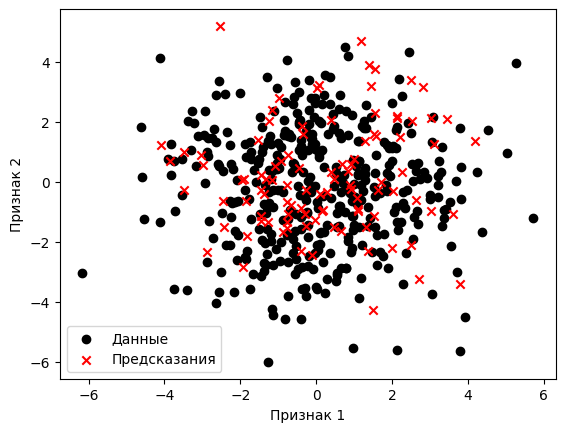

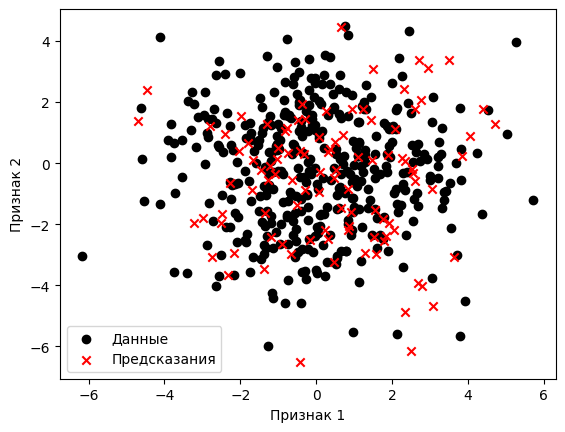

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(7)
n_samples = 400
X = np.random.randn(n_samples, 2)
X *= 2

# Создание целевой переменной как расстояние от начала координат
y = np.linalg.norm(X, axis=1)

# Создание модели K-NN регрессии (k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.randn(100, 2) * 2  # Генерация новых точек
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

# Создание модели K-NN регрессии (k=20)
knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.randn(100, 2) * 2  # Генерация новых точек
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

####XOR данные

Точность K-NN (классификация, k=5): 0.96
Точность радиусного классификатора: 0.45
Точность взвешенного K-NN (k=5): 0.96
Точность взвешенного K-NN (k=20): 0.97


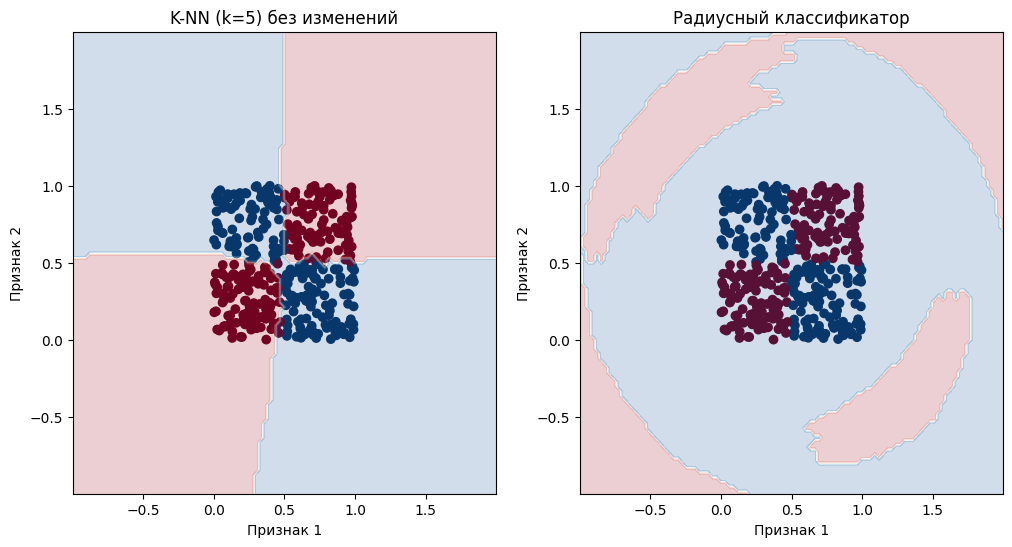

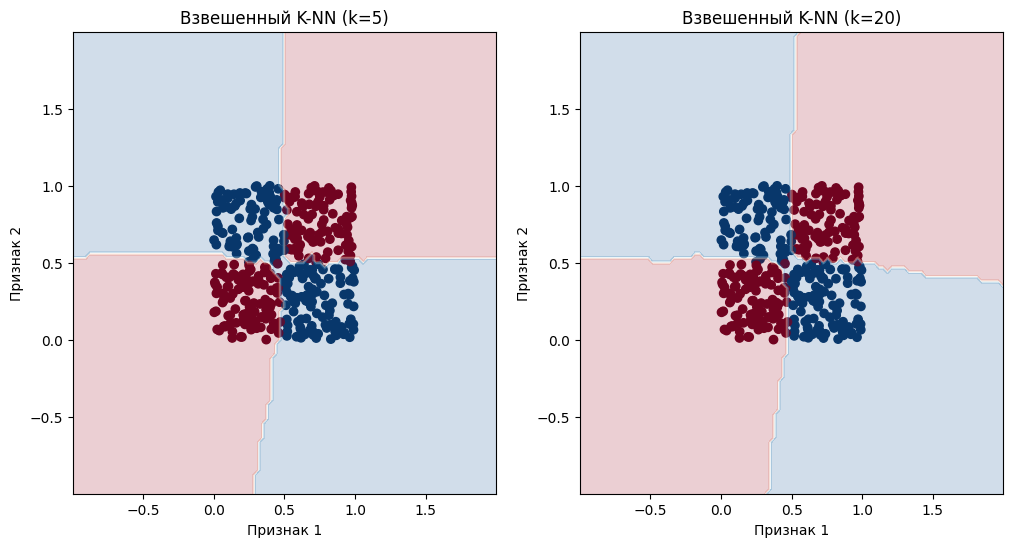

In [ ]:
# Генерация данных в форме XOR
np.random.seed(0)
X = np.random.rand(400, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = X[:200], X[200:], y[:200], y[200:]

# К-NN для классификации без изменений (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print(f'Точность K-NN (классификация, k=5): {accuracy:.2f}')

# Радиусный классификатор (радиус=1.5)
radius_classifier = RadiusNeighborsClassifier(radius=1.5)
radius_classifier.fit(X_train, y_train)
accuracy = radius_classifier.score(X_test, y_test)
print(f'Точность радиусного классификатора: {accuracy:.2f}')

# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)
accuracy = weighted_knn_5.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=5): {accuracy:.2f}')

# Взвешенный K-NN с k=20
weighted_knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
weighted_knn_20.fit(X_train, y_train)
accuracy = weighted_knn_20.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=20): {accuracy:.2f}')

# Визуализация данных и границы принятия решений (k-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("K-NN (k=5) без изменений")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=20)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=20)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

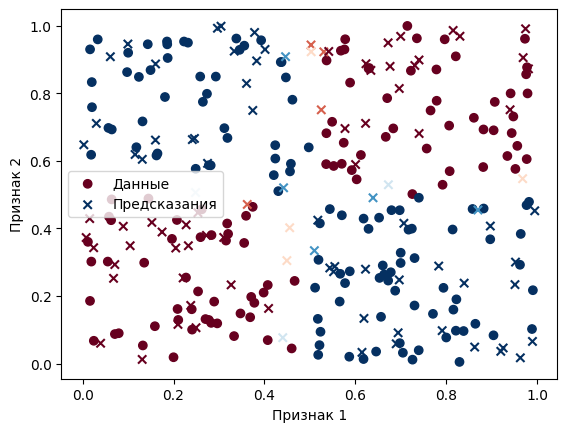

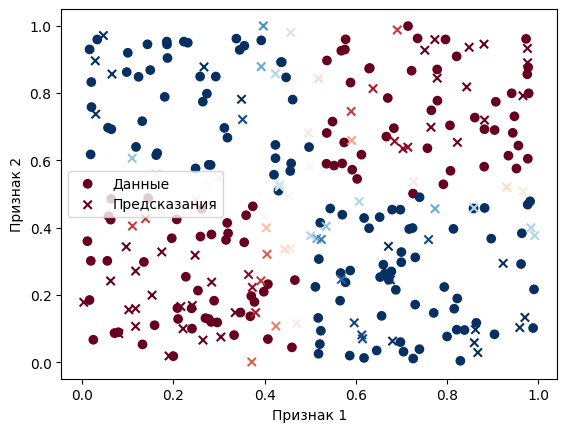

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Генерация данных XOR
np.random.seed(0)
X = np.random.rand(200, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)

# Создание модели K-NN регрессии (k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.rand(100, 2)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='RdBu', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.rand(100, 2)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='RdBu', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()


####Данные с выбросами

Точность K-NN (классификация, k=5): 0.95
Точность радиусного классификатора: 0.82
Точность взвешенного K-NN (k=5): 0.94
Точность взвешенного K-NN (k=20): 0.94


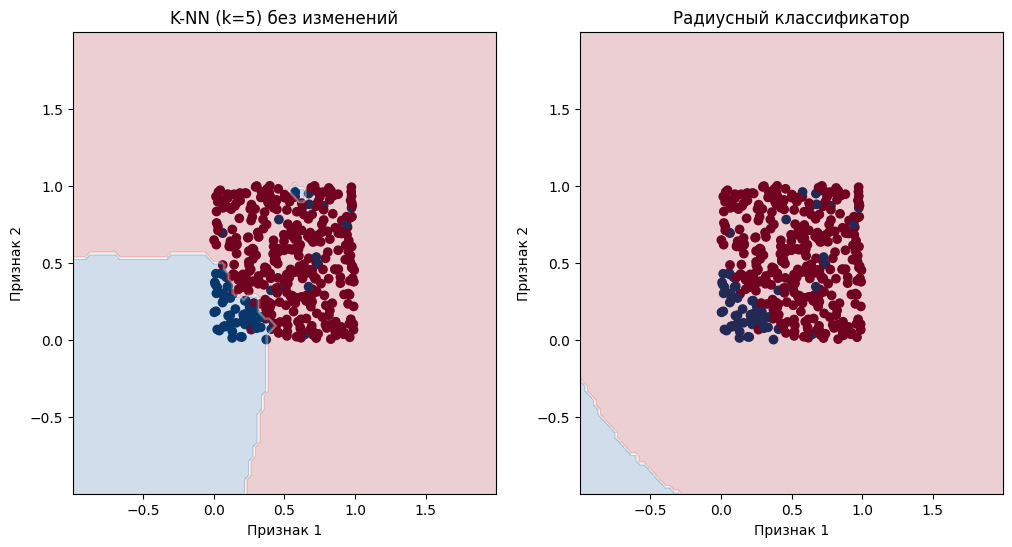

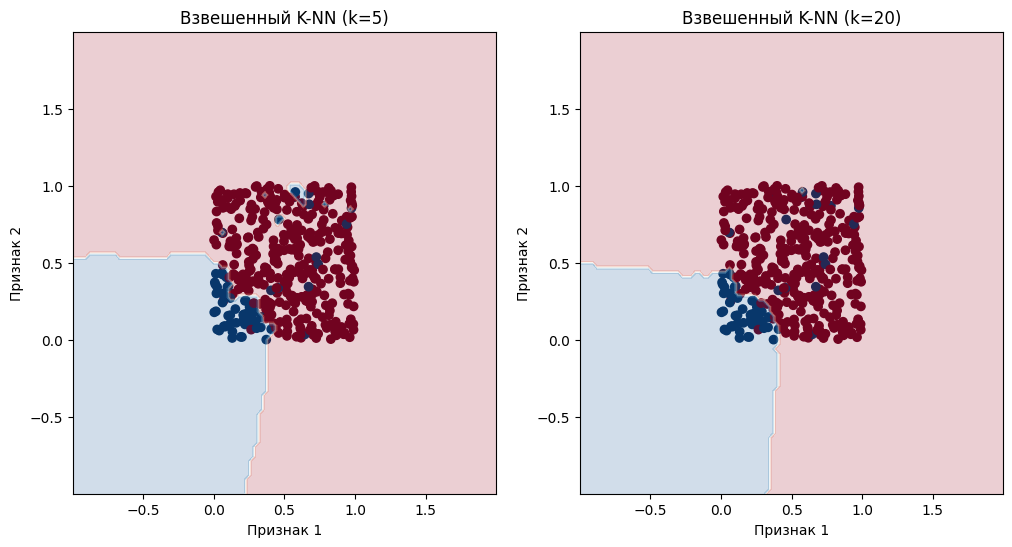

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
# Генерация данных с выбросами
np.random.seed(0)
X = np.random.rand(400, 2)
y = (X[:, 0] + X[:, 1] < 0.5).astype(int)
# Создаем выбросы
outliers = np.random.choice(400, 20, replace=False)
y[outliers] = 1.6 - y[outliers]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = X[:200], X[200:], y[:200], y[200:]

# К-NN для классификации без изменений (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print(f'Точность K-NN (классификация, k=5): {accuracy:.2f}')

# Радиусный классификатор (радиус=1)
radius_classifier = RadiusNeighborsClassifier(radius=1.5)
radius_classifier.fit(X_train, y_train)
accuracy = radius_classifier.score(X_test, y_test)
print(f'Точность радиусного классификатора: {accuracy:.2f}')

# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)
accuracy = weighted_knn_5.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=5): {accuracy:.2f}')

# Взвешенный K-NN с k=20
weighted_knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
weighted_knn_20.fit(X_train, y_train)
accuracy = weighted_knn_20.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=20): {accuracy:.2f}')

# Визуализация данных и границы принятия решений (k-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("K-NN (k=5) без изменений")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=20)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=20)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.show()

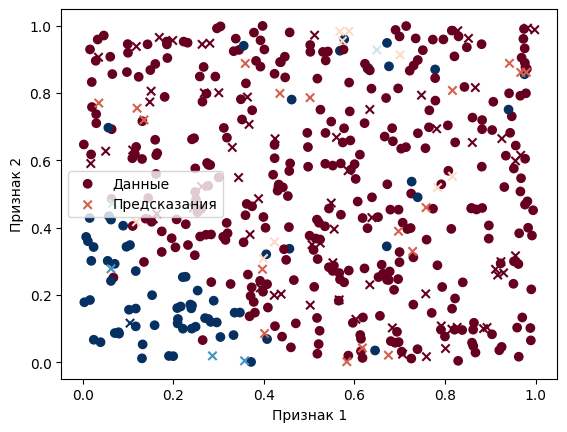

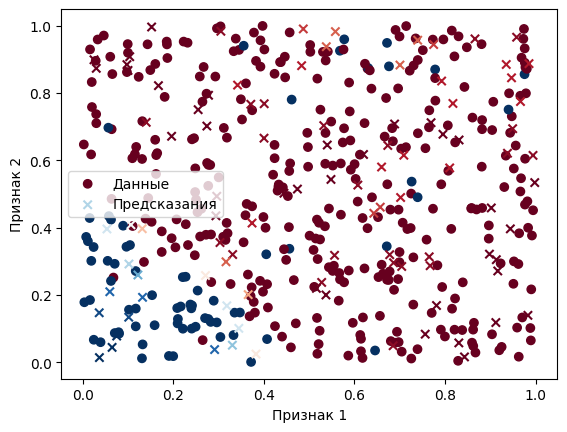

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
# Генерация данных с выбросами
np.random.seed(0)
X = np.random.rand(400, 2)
y = (X[:, 0] + X[:, 1] < 0.5).astype(int)
# Создаем выбросы
outliers = np.random.choice(400, 20, replace=False)
y[outliers] = 5 - y[outliers]

# Создание модели K-NN регрессии (k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.rand(100, 2)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='RdBu', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X, y)

# Генерация новых данных для предсказания
X_new = np.random.rand(100, 2)
y_pred = knn_regressor.predict(X_new)

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', marker='o', label='Данные')
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='RdBu', marker='x', label='Предсказания')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

###2.Применить метод k ближайших соседей для решения задач классификации и регрессии с использованием собственных пользовательских данных.

In [ ]:
Custom_feathers = pd.read_csv('s5.csv')
print(Custom_feathers)

            x        y  group
0    0.004814  0.42148      1
1   -0.084563  0.35955      1
2   -0.430350  0.11529      1
3    0.755080  1.00950      1
4    0.556150  0.86155      1
..        ...      ...    ...
295 -0.086462  0.44886     15
296 -0.081758  0.45650     15
297 -0.053442  0.47265     15
298 -0.070159  0.45759     15
299 -0.088039  0.46253     15

[300 rows x 3 columns]


In [ ]:
selected_marks = [1,4,7,10,14]
Selected_feathers = Custom_feathers[Custom_feathers['group'].isin(selected_marks)]
Selected_feathers

x        y  group
0    0.004814  0.42148      1
1   -0.084563  0.35955      1
2   -0.430350  0.11529      1
3    0.755080  1.00950      1
4    0.556150  0.86155      1
..        ...      ...    ...
275 -0.901500 -0.84754     14
276  1.431700  0.67667     14
277 -0.187380 -0.36246     14
278  1.478100  0.71358     14
279  2.171800  1.16260     14

[100 rows x 3 columns]

Точность K-NN (классификация, k=5): 0.80
Точность радиусного классификатора: 0.20
Точность взвешенного K-NN (k=5): 0.85
Точность взвешенного K-NN (k=20): 0.85


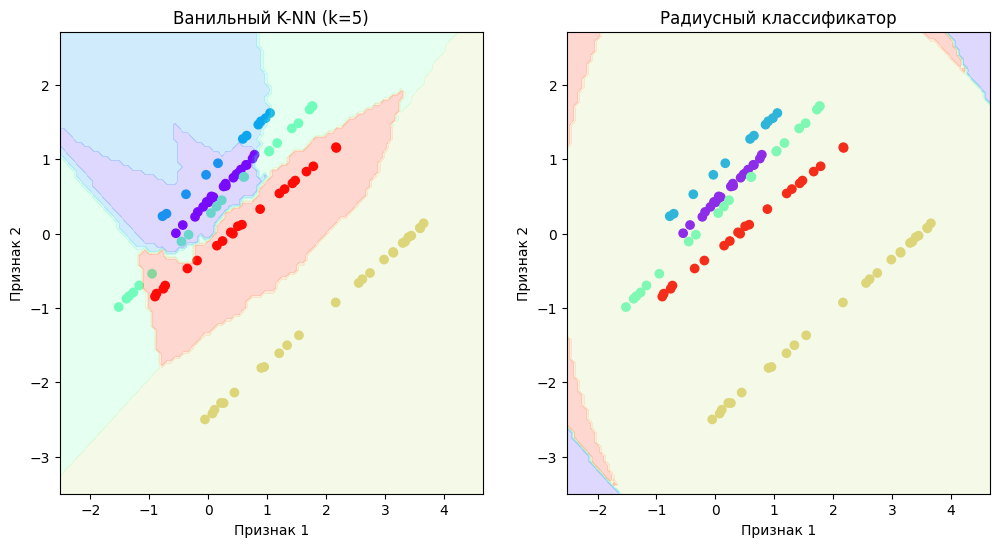

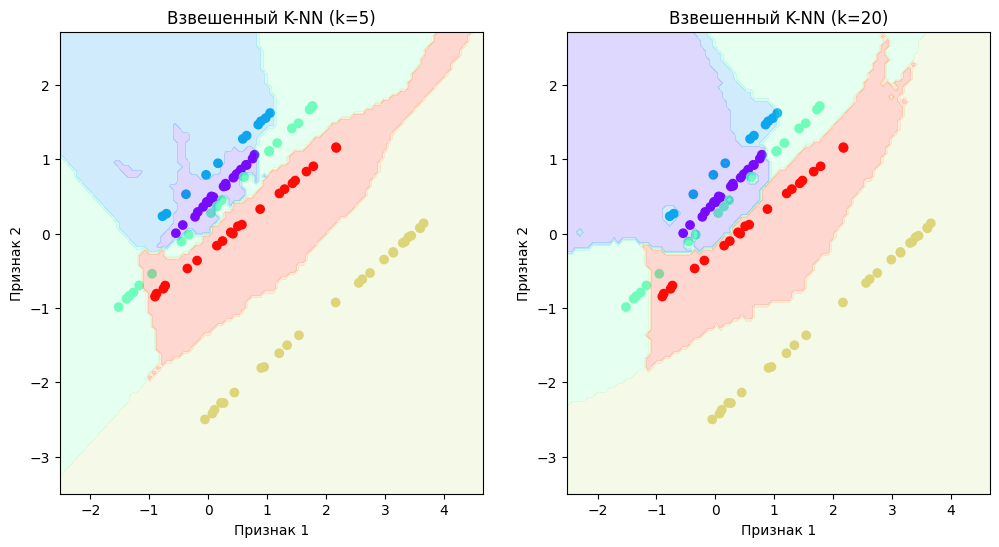

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

X = Selected_feathers[['x','y']]
y = Selected_feathers['group']
#Crowdedness - Скученность, Humidity - Влажность
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# К-NN для классификации без изменений (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print(f'Точность K-NN (классификация, k=5): {accuracy:.2f}')

# Радиусный классификатор (радиус=3)
radius_classifier = RadiusNeighborsClassifier(radius=6)
radius_classifier.fit(X_train, y_train)
accuracy = radius_classifier.score(X_test, y_test)
print(f'Точность радиусного классификатора: {accuracy:.2f}')

# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)
accuracy = weighted_knn_5.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=5): {accuracy:.2f}')

# Взвешенный K-NN с k=20
weighted_knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
weighted_knn_20.fit(X_train, y_train)
accuracy = weighted_knn_20.score(X_test, y_test)
print(f'Точность взвешенного K-NN (k=20): {accuracy:.2f}')

# Визуализация данных и границы принятия решений (k-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Ванильный K-NN (k=5)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=20)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=20)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

plt.show()

###3.Сгенерировать данные, повторяющие пример из лекций для полиномиального обогащения и реализовать решение задачи классификации с использованием метода опорных векторов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Создание набора точек в форме облака
x_cloud = np.random.normal(0, 0.7, 100)  # x-координаты случайных точек
y_cloud = np.random.normal(0, 0.7, 100)  # y-координаты случайных точек
#Полиноминальное обогащение
z_cloud = x_cloud**2 + y_cloud**2
X1 = np.vstack((x_cloud, y_cloud, z_cloud)).T


# Создание набора точек внешнего круга с шумом
theta = np.linspace(0, 2*np.pi, 100)  # углы от 0 до 2*pi
radius = 10  # радиус круга
x_circle = radius * np.cos(theta) + np.random.normal(0, 0.7, 100)  # x-координаты точек на окружности с шумом
y_circle = radius * np.sin(theta) + np.random.normal(0, 0.7, 100)  # y-координаты точек на окружности с шумом
z_circle = x_circle**2 + y_circle**2

X2 = np.vstack((x_circle, y_circle, z_circle)).T

y1 = np.zeros(100)
y2 = np.ones(100)

# Объединяем данные
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Создаем трехмерную фигуру
fig = go.Figure(data=[
    go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers', marker=dict(color=y, colorscale='RdBu', size=5)),
])
# Настраиваем оси и метки
fig.update_layout(scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z')),
                  title='Трехмерная визуализация данных', autosize=False,
                  width=800, height=600)

# Отображаем фигуру
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objs as go

# Создадим модель LinearSVC (линейный SVM)
linear_svm = LinearSVC(C=0.1, loss='hinge', multi_class='crammer_singer')
linear_svm.fit(X, y)

# Создаем трехмерную фигуру для визуализации данных
fig = go.Figure()

# Визуализация данных
fig.add_trace(go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        color=y,
        colorscale='RdBu',
        size=5,
    ),
    name='Data Points'
))

# Визуализация разделяющей плоскости
x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50)
y_values = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50)
xx, yy = np.meshgrid(x_values, y_values)
xy = np.column_stack((xx.ravel(), yy.ravel()))
xy_enriched = np.c_[xy, xy[:, 0] ** 2 + xy[:, 1] ** 2]  # Применение полиномиального обогащения
zz = linear_svm.decision_function(xy_enriched)
zz = zz.reshape(xx.shape)
fig.add_trace(go.Surface(
    z=zz + 40,
    x=x_values,
    y=y_values,
    colorscale='Viridis',
    showscale=False,
    opacity=0.7,
    name='Decision Surface'
))

# Настраиваем оси и метки
fig.update_layout(scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z')),
                  title='Трехмерная визуализация данных и разделяющей плоскости',
                  autosize=False, width=800, height=600)

# Отображаем фигуру
fig.show()

###4.Реализовать метод опорных векторов для различных ядерных функций для классификации модельных и реальных пользовательских данных.

####Сгенерированные данные

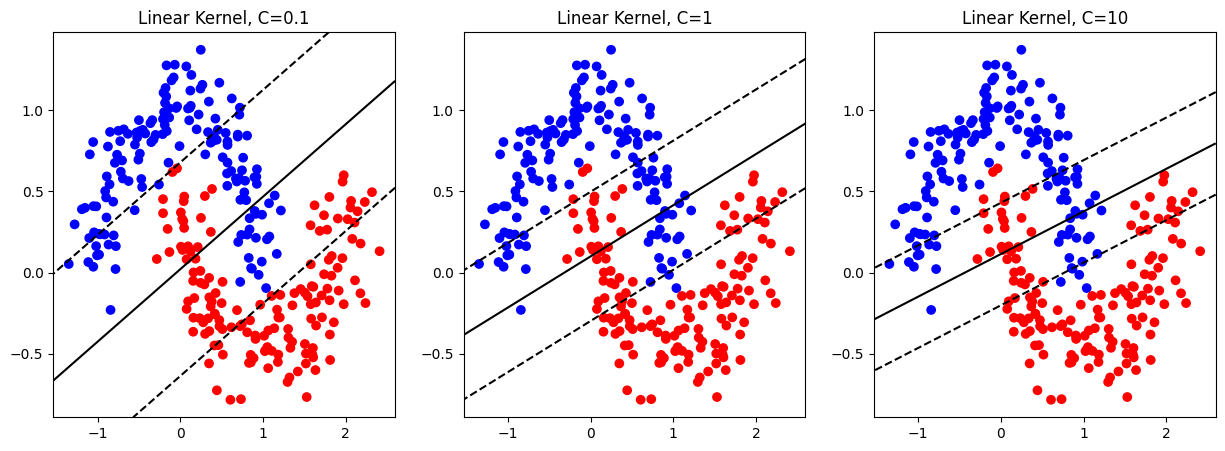

<Figure size 1500x1500 with 0 Axes>

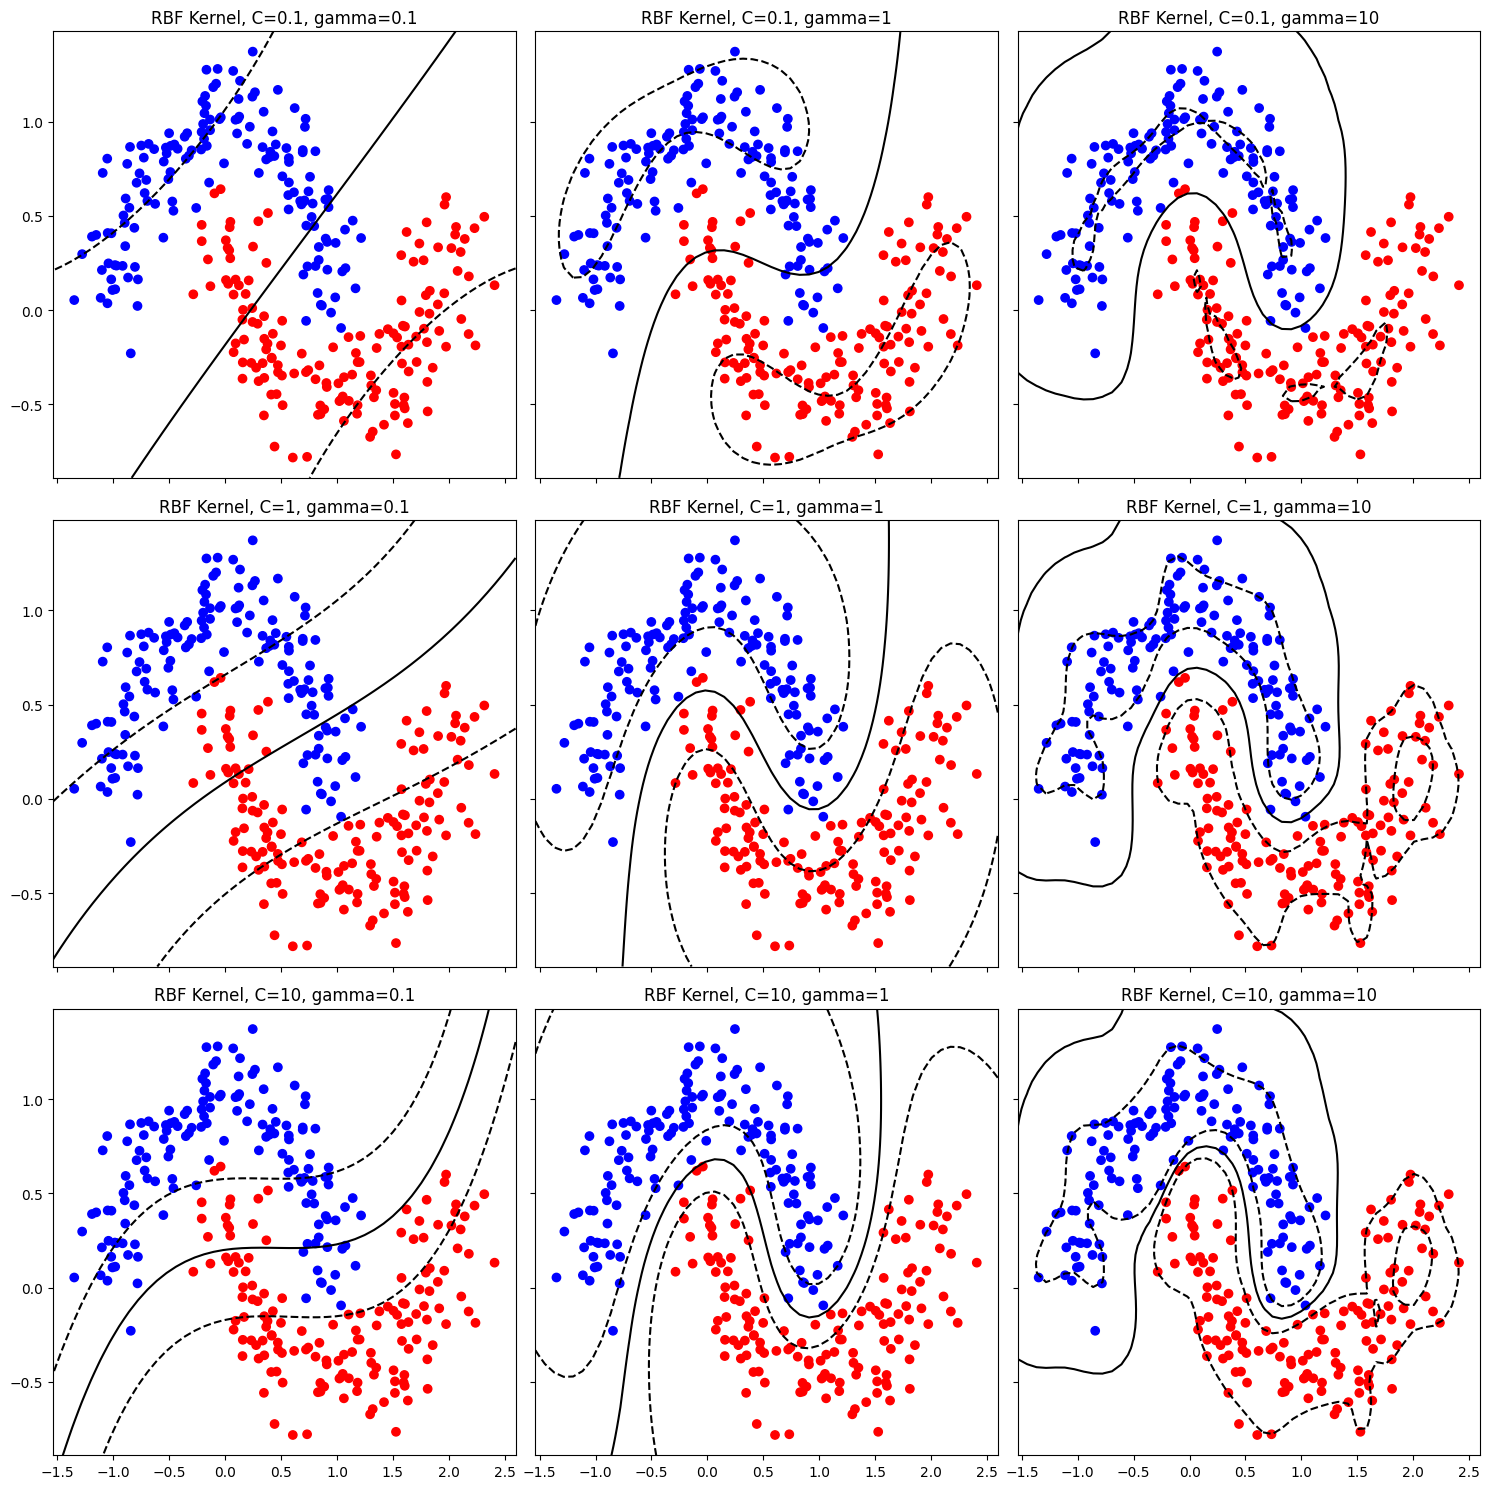

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Генерируем случайные данные для примера
np.random.seed(7)

# Создание U-образных данных
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим SVM модели с разными ядрами и параметрами
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

plt.figure(figsize=(15, 5))

# Линейное ядро
for i, C in enumerate(C_values):
    plt.subplot(1, len(C_values), i+1)
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    plt.title(f'Linear Kernel, C={C}')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# RBF ядро
plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 15), sharex=True, sharey=True)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        ax = axes[i, j]
        ax.set_title(f'RBF Kernel, C={C}, gamma={gamma}')
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()


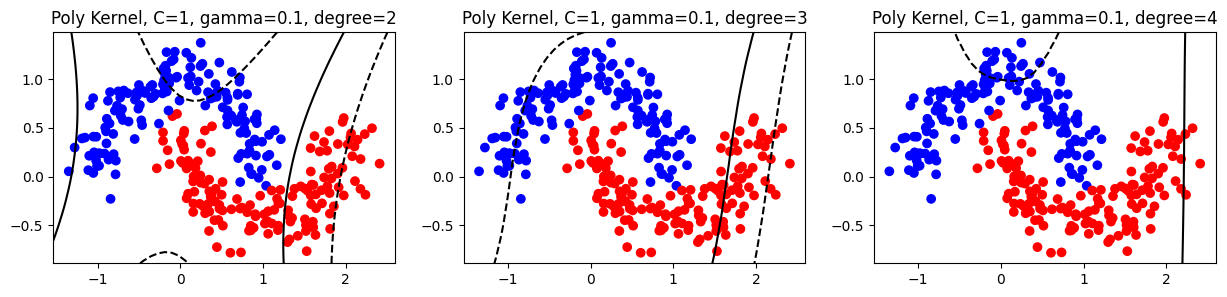

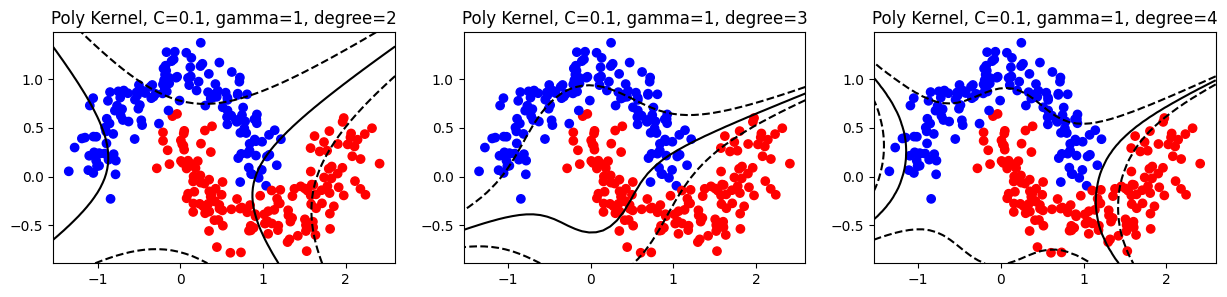

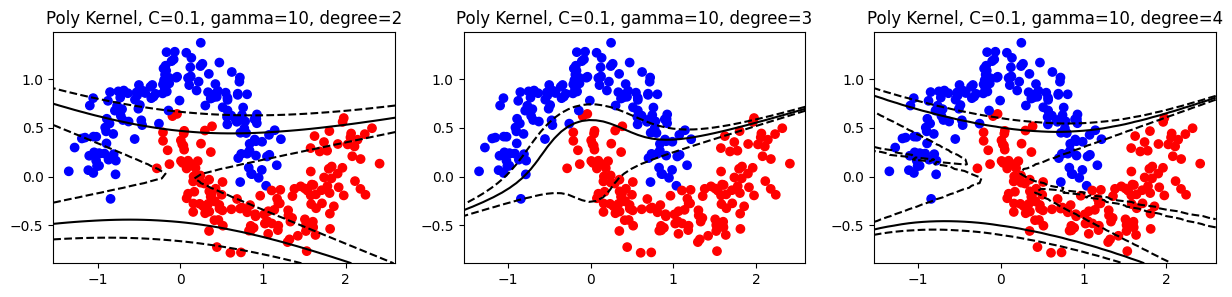

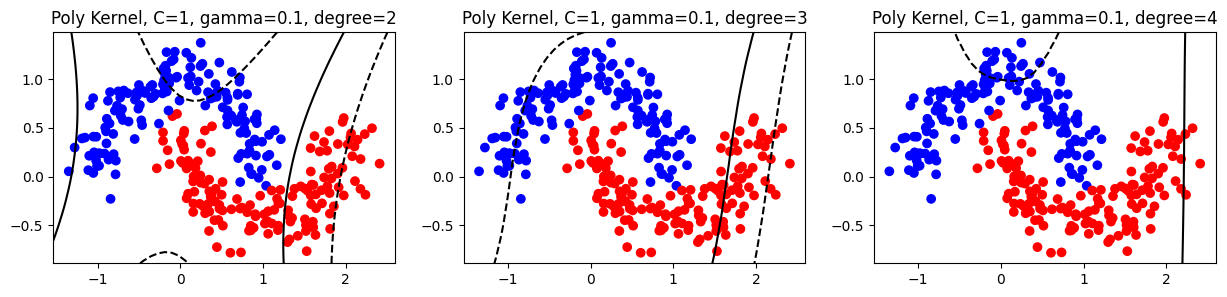

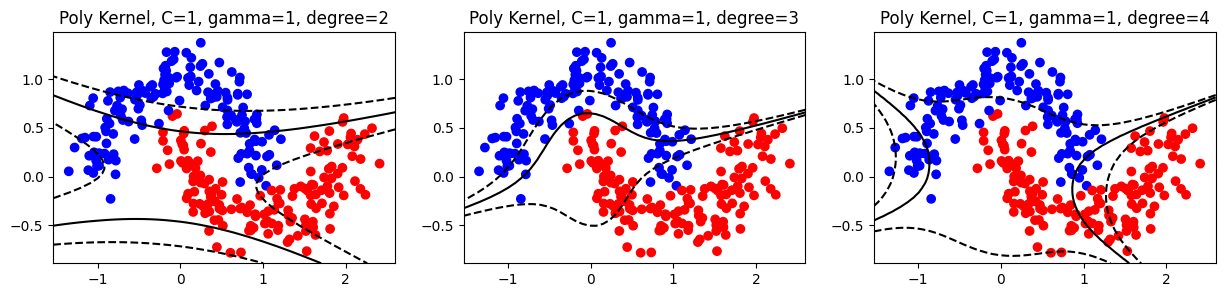

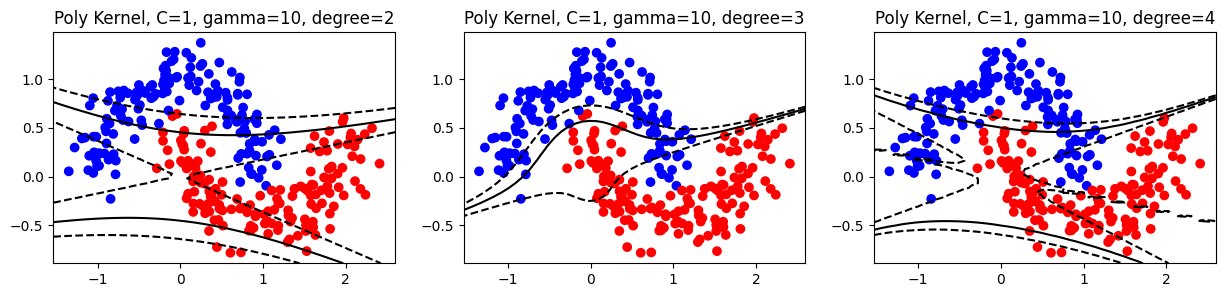

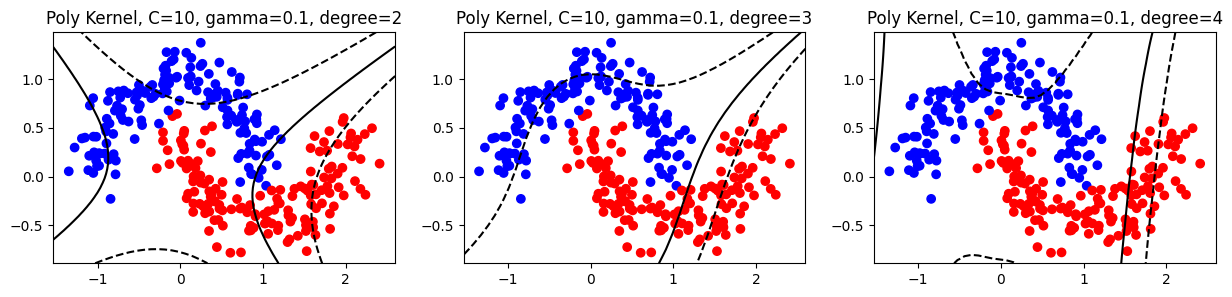

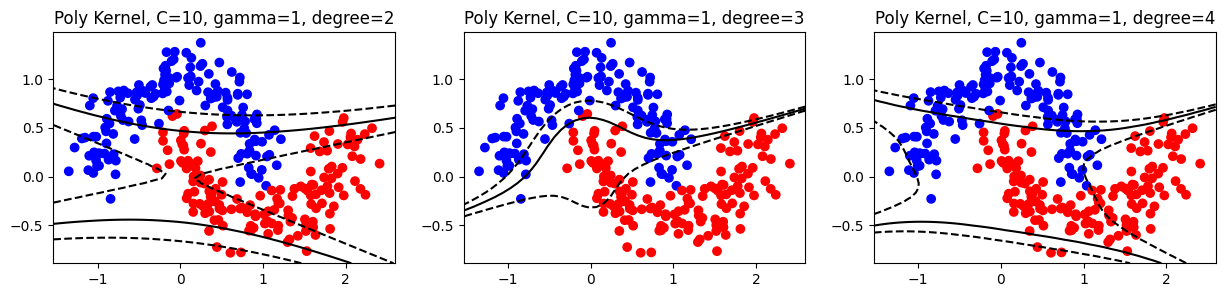

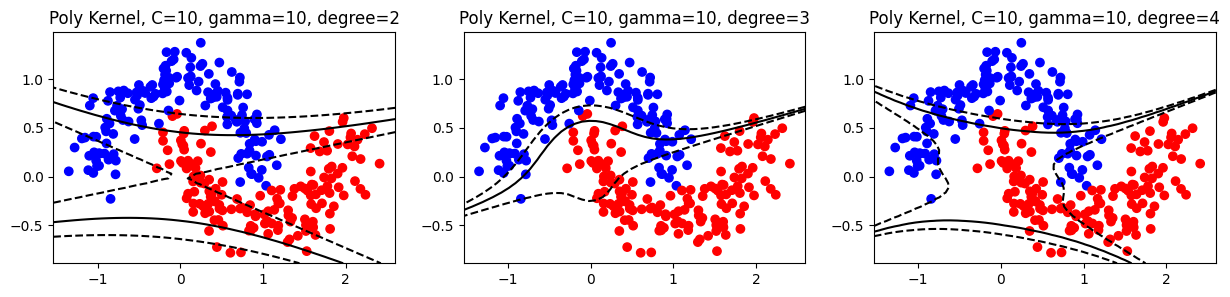

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Генерируем случайные данные для примера
np.random.seed(7)

# Создание U-образных данных
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим SVM модели с разными ядрами и параметрами
kernels = ['linear', 'rbf', 'poly']
C_values = [1, 10]
gamma_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

plt.figure(figsize=(15, 3))  # Изменим размер фигуры

# Poly ядро

for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={0.1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=0.1, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={0.1}, gamma={1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=0.1, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={0.1}, gamma={10}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={0.1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={10}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={0.1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={1}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={10}, degree={degree}')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()

####Пользовательские данные

In [ ]:
Basic_Crusible_currency_merged = pd.read_csv('Basic_Crusible_currency_merged.csv')

In [ ]:
Fortnite_Statistics = pd.read_csv('Fortnite Statistics.csv')

In [ ]:
selected_columns = ['Eliminations','Accuracy','Hits']
Fortnite_df = pd.DataFrame(Fortnite_Statistics[selected_columns])
Fortnite_df['Elim atleast 1'] = Fortnite_df['Eliminations'].apply(lambda x: 1 if x > 1 else 0)
Fortnite_df['Accuracy%'] = Fortnite_df['Accuracy'].str.rstrip('%').astype('float')
Fortnite_df

Eliminations Accuracy  Hits  Elim atleast 1  Accuracy%
0              2      23%    14               1       23.0
1              1      30%    19               0       30.0
2              3      30%    32               1       30.0
3              1      18%    19               0       18.0
4              3      58%    42               1       58.0
..           ...      ...   ...             ...        ...
82             8      31%    97               1       31.0
83             4      20%    12               1       20.0
84             1      28%    40               0       28.0
85             3      26%    25               1       26.0
86             1      31%    12               0       31.0

[87 rows x 5 columns]

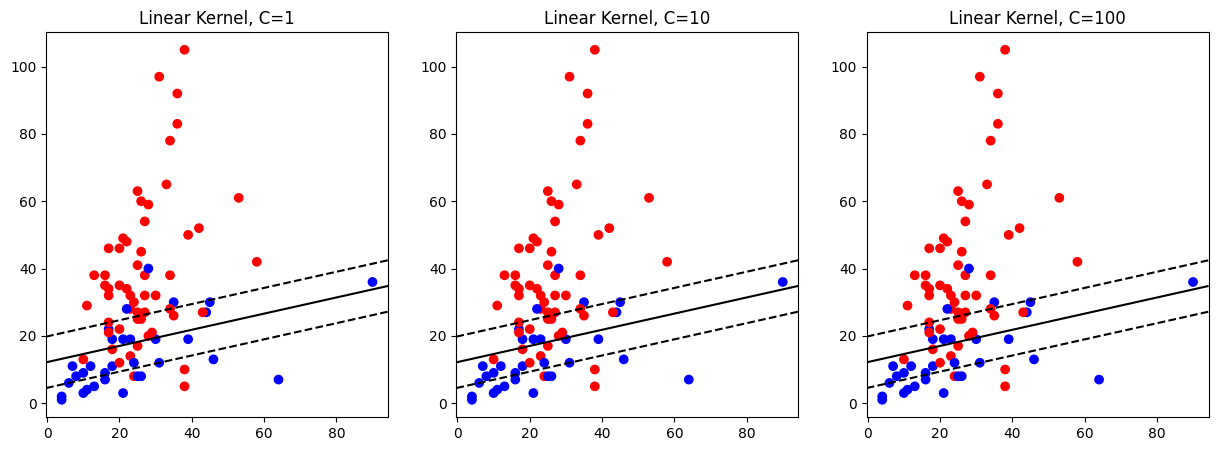

<Figure size 1500x1500 with 0 Axes>

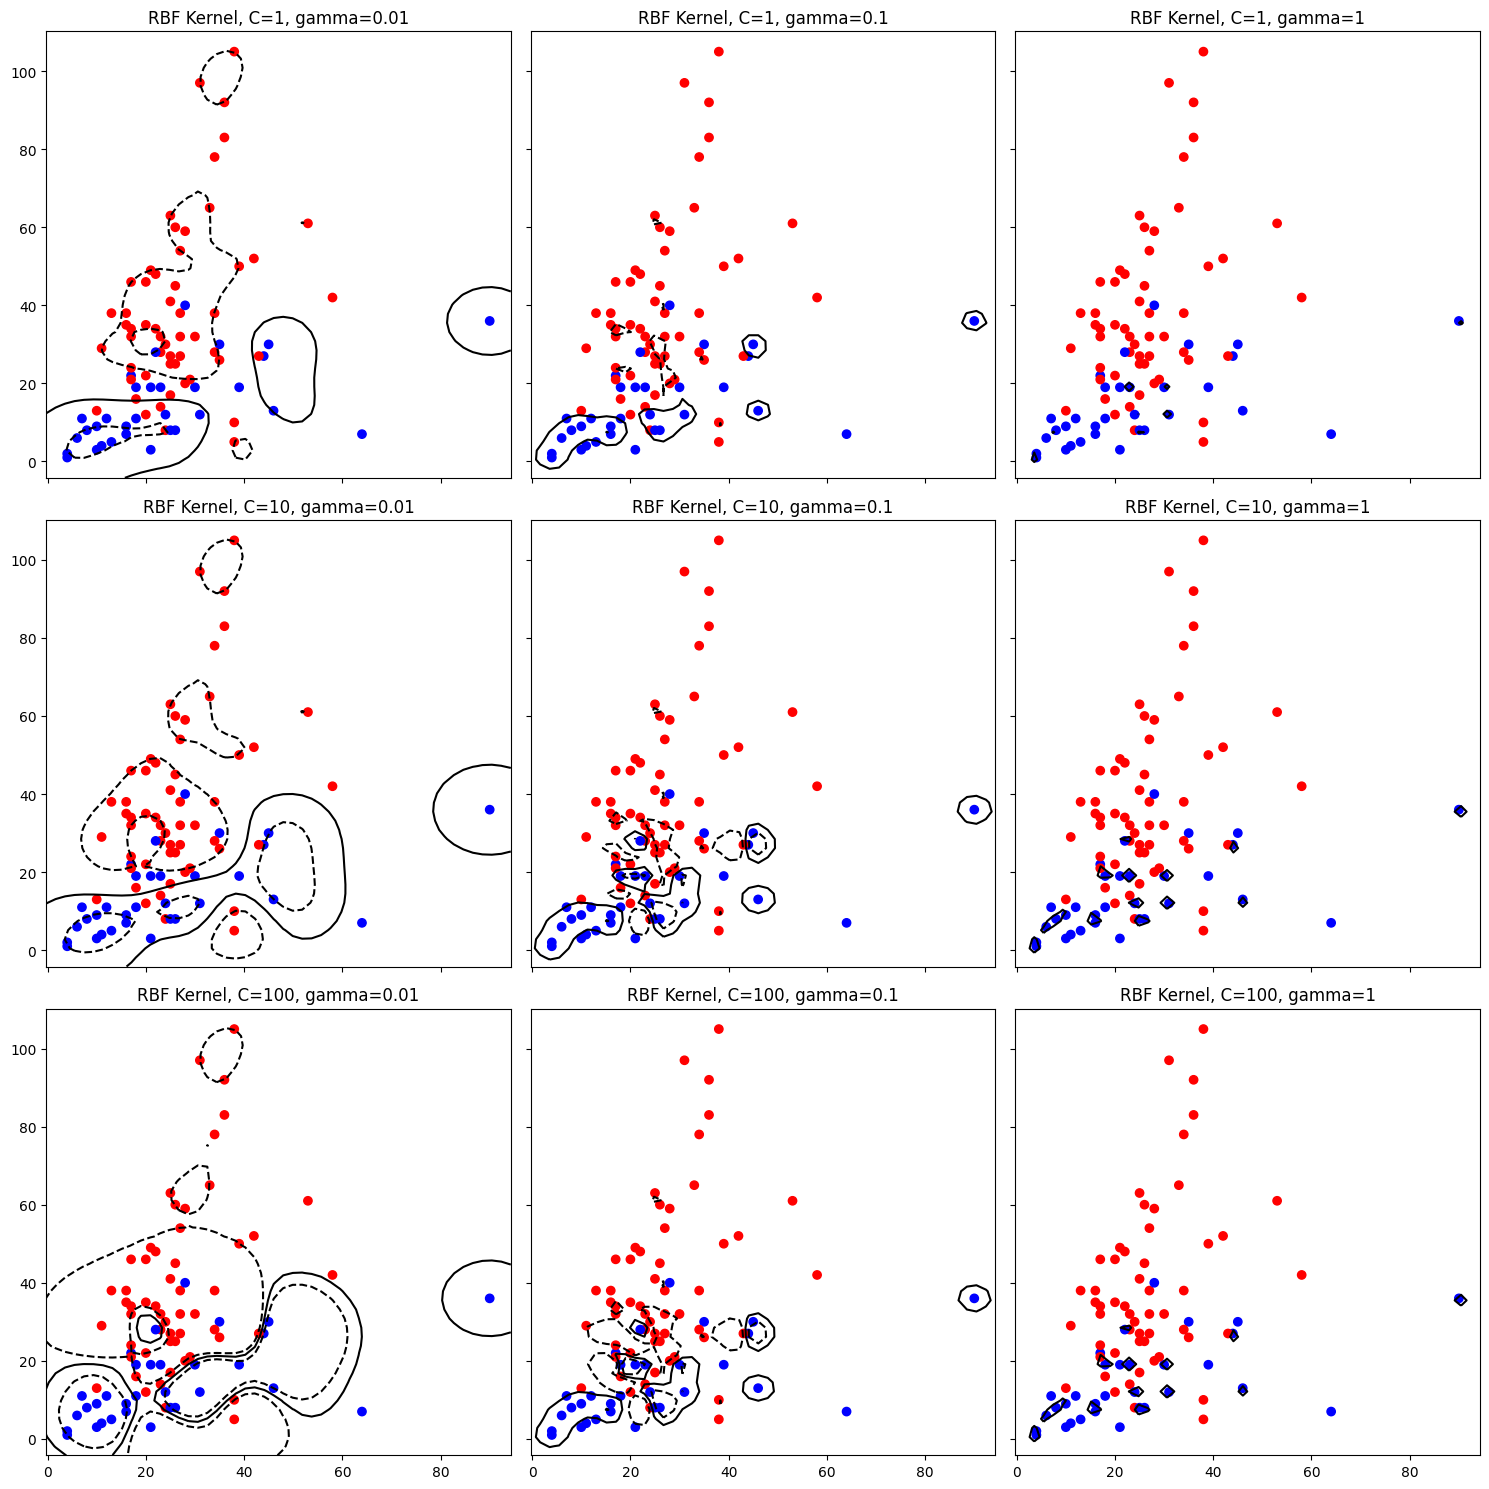

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = Fortnite_df[['Accuracy%','Hits']]
y = Fortnite_df['Elim atleast 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим SVM модели с разными ядрами и параметрами
kernels = ['linear', 'rbf', 'poly']
C_values = [1, 10, 100]
gamma_values = [0.01, 0.1, 1]
degree_values = [2, 3]

plt.figure(figsize=(15, 5))

# Линейное ядро
for i, C in enumerate(C_values):
    plt.subplot(1, len(C_values), i+1)
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    plt.title(f'Linear Kernel, C={C}')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# RBF ядро
plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 15), sharex=True, sharey=True)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        ax = axes[i, j]
        ax.set_title(f'RBF Kernel, C={C}, gamma={gamma}')
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()


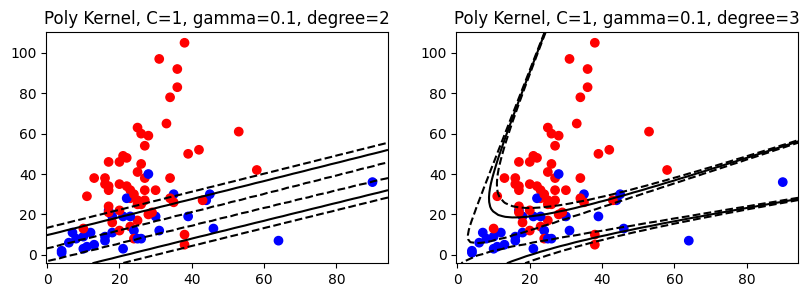

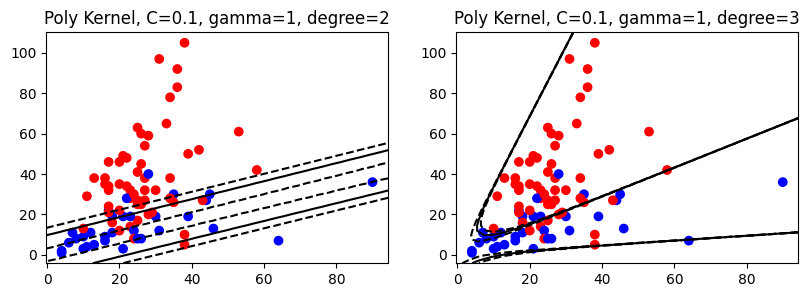

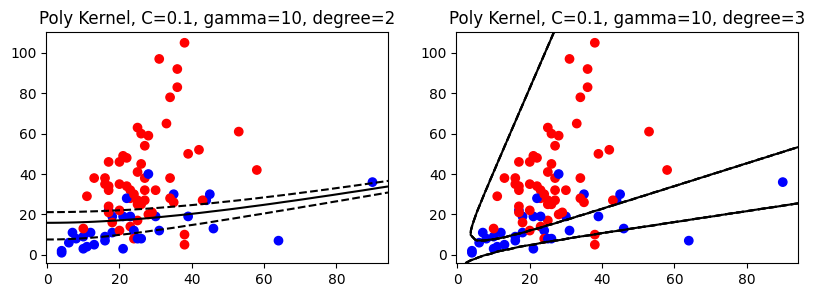

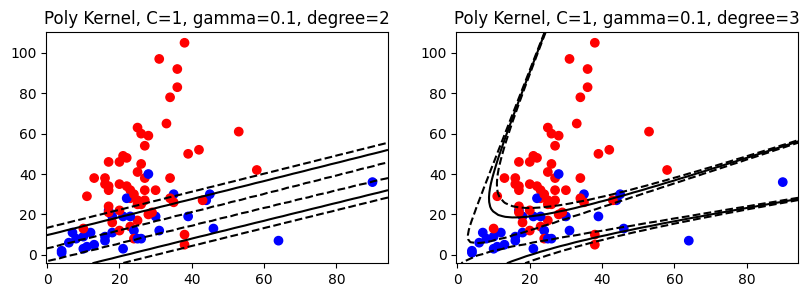

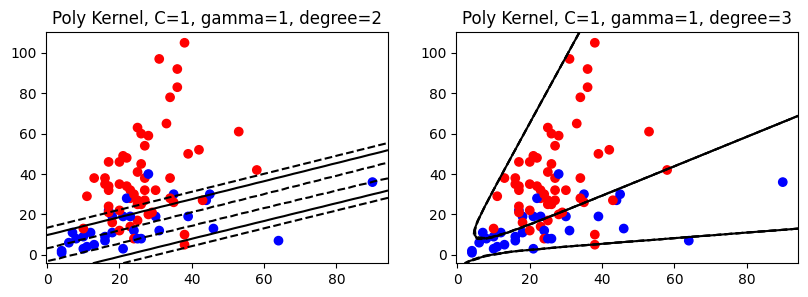

In [ ]:

plt.figure(figsize=(15, 3))  # Изменим размер фигуры

# Poly ядро

for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={0.1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=0.1, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={0.1}, gamma={1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=0.1, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={0.1}, gamma={10}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={0.1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=1, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={1}, gamma={10}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=0.1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={0.1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=1, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={1}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()
plt.figure(figsize=(15, 3))
for k, degree in enumerate(degree_values):
        plt.subplot(1, 3, k + 1)
        svm = SVC(kernel='poly', C=10, gamma=10, degree=degree)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        plt.title(f'Poly Kernel, C={10}, gamma={10}, degree={degree}')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                                 np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()

###5.Реализовать регрессионную версию метода опорных векторов и применить к собственным пользовательским данным.

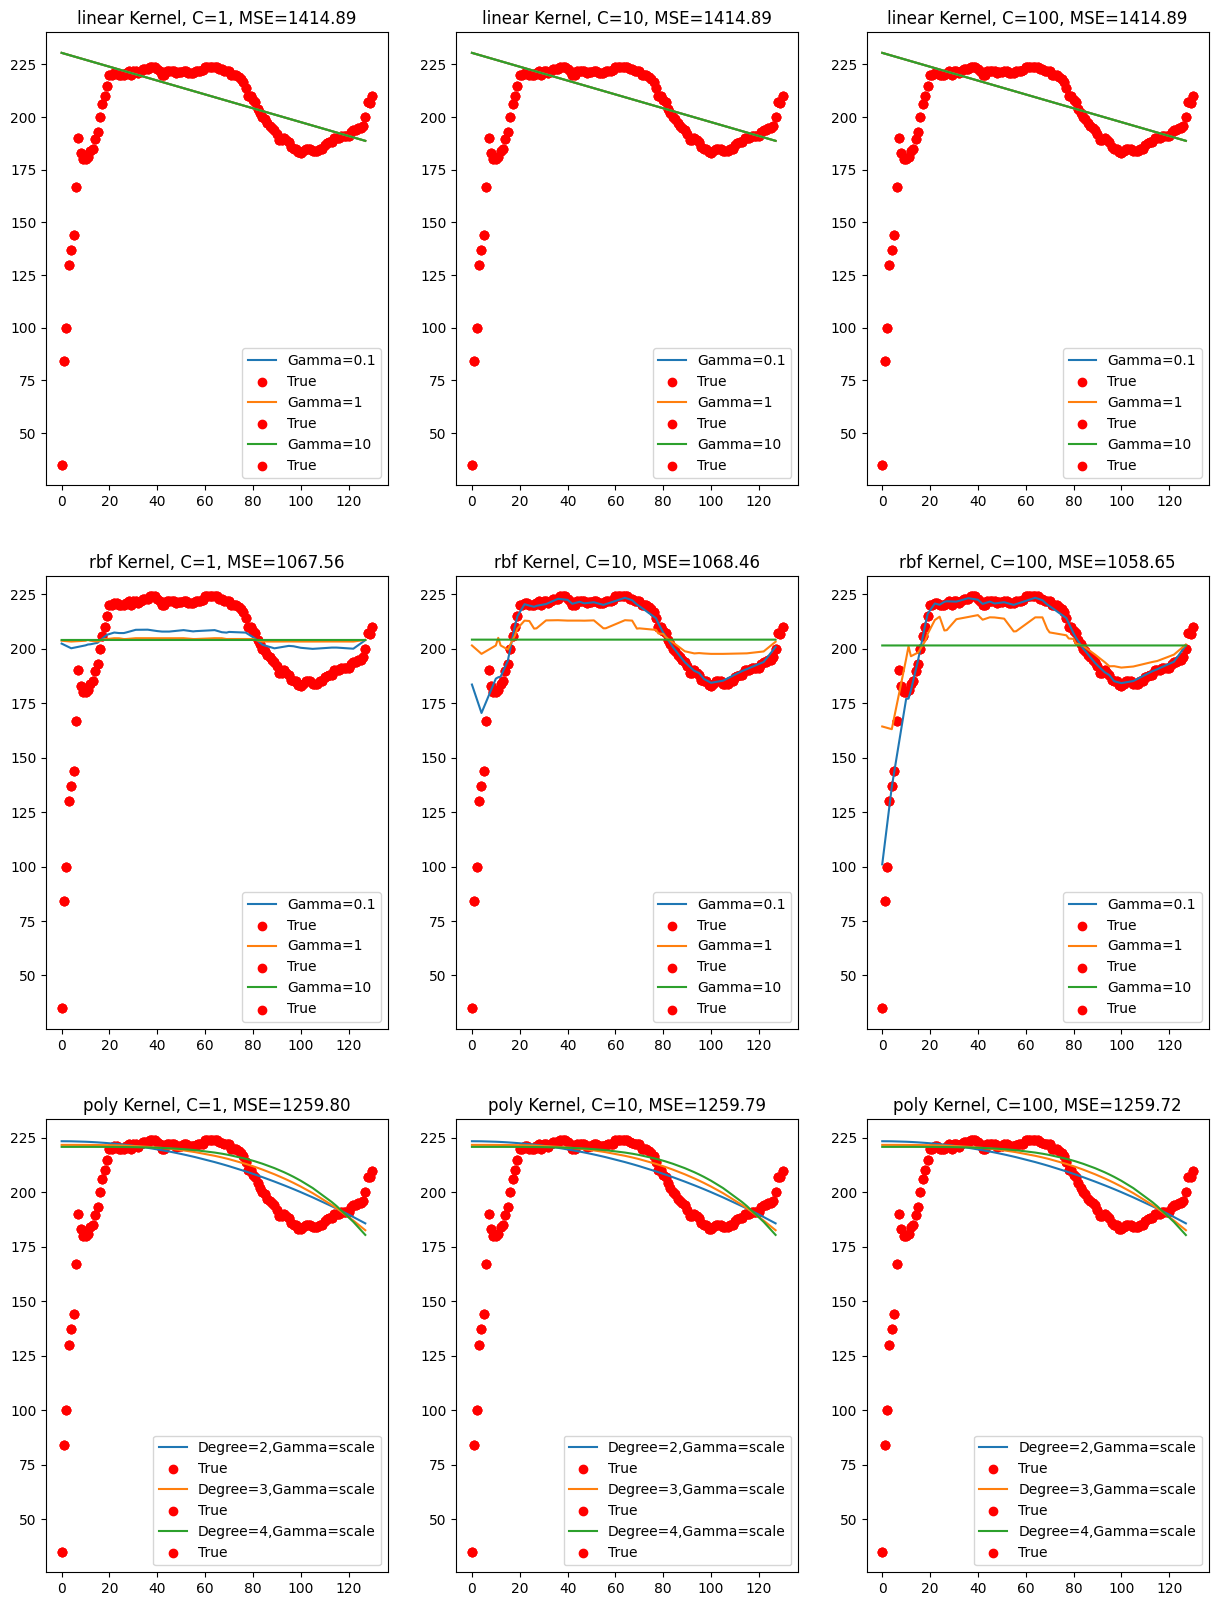

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = Basic_Crusible_currency_merged[['Days from start']]
y = Basic_Crusible_currency_merged['Divine buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим SVR модели с разными ядрами и параметрами
kernels = ['linear', 'rbf', 'poly']
C_values = [1, 10, 100]
gamma_values = [0.1, 1, 10]
degree_values = [2, 3, 4]
color_g = ['b','r','g']
plt.figure(figsize=(15, 20))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        if kernel == 'poly':
            for k, degree in enumerate(degree_values):
                svr = SVR(kernel=kernel, C=C,  epsilon=0.7, degree=degree)
                svr.fit(X_train, y_train)
                y_pred = svr.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)

                plt.subplot(len(kernels), len(C_values), i * len(C_values) + j + 1)
                plt.title(f'{kernel} Kernel, C={C}, MSE={mse:.2f}')
                order = np.argsort(X_test['Days from start'])
                plt.plot(X_test['Days from start'].iloc[order], y_pred[order], label=f"Degree={degree},Gamma={'scale'}")
                plt.scatter(X['Days from start'], y, alpha = 1, c='red', marker='o', label='True')
                plt.legend()

        else:
            for k, gamma in enumerate(gamma_values):
                svr = SVR(kernel=kernel, C=C, epsilon=0.7, gamma=gamma)
                svr.fit(X_train, y_train)
                y_pred = svr.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)

                plt.subplot(len(kernels), len(C_values), i * len(C_values) + j + 1)
                plt.title(f'{kernel} Kernel, C={C}, MSE={mse:.2f}')
                order = np.argsort(X_test['Days from start'])
                plt.plot(X_test['Days from start'].iloc[order], y_pred[order], label=f"Gamma={gamma}")
                plt.scatter(X['Days from start'], y, alpha = 1, c='red', marker='o', label='True')

                plt.legend()

plt.show()
